In [1]:
from SimPEG import Mesh, Utils, Solver
%pylab inline

/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [98]:
mesh = Mesh.TensorMesh([50,50])

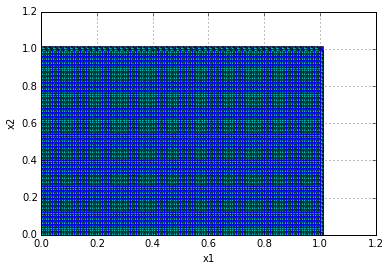

In [99]:
mesh.plotGrid(faces=True, nodes=True, edges=True)

In [100]:
Div = mesh.faceDiv
mesh.setCellGradBC('dirichlet')
Grad = mesh.cellGrad
sigma = np.ones(mesh.nC)*1e-2
Msig = mesh.getFaceInnerProduct(sigma)

In [107]:
A = -Div*Msig*Grad
q = np.zeros(mesh.nC)
inds = Utils.closestPoints(mesh, [np.r_[0.2, 0.5], np.r_[0.8, 0.5]])
q[inds] = [1., -1.]

In [108]:
Ainv = Solver(A)
sol = Ainv*q

(<matplotlib.collections.QuadMesh at 0x1187a6c90>,)

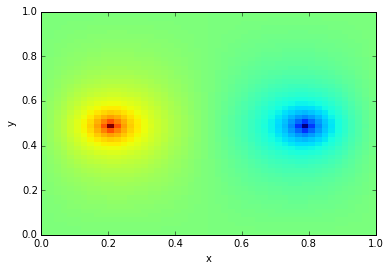

In [109]:
mesh.plotImage(sol)

(<matplotlib.collections.QuadMesh at 0x1188a0e90>,
 <matplotlib.streamplot.StreamplotSet at 0x119237810>)

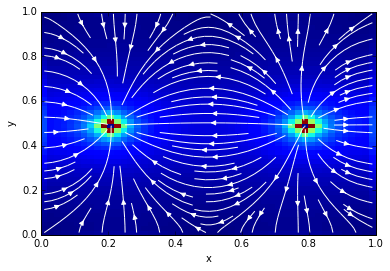

In [111]:
mesh.plotImage(Grad*sol, vType='F', view='vec', streamOpts={'color':'w'})